## Replacing outliers using Random Forest Regressor
<!-- Steps to remove outliers using RFR only steps not code -->
1. **Identify Outliers**: Use statistical methods (like Z-score, IQR) or visualization techniques (like box plots) to identify outliers in your dataset.
2. **Prepare Data**: Separate the dataset into two parts: one containing the outliers and the other containing the normal data points.
3. **Train Random Forest Regressor**: Use the normal data points to train a
    Random Forest Regressor model. The features will be the independent variables, and the target will be the dependent variable.
4. **Predict Outliers**: Use the trained Random Forest Regressor to predict the values for the outliers based on their features.
5. **Replace Outliers**: Replace the original outlier values in the dataset with the predicted values from the Random Forest Regressor.
6. **Validate**: After replacing the outliers, validate the dataset to ensure that the changes have improved the data quality. You can use statistical measures or visualization techniques to compare the dataset before and after outlier replacement.



## 1. Identify Outliers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Detecting Outliers
df = pd.read_csv('../Datasets/airbnb.csv')
# Filling missing values
cols = {"name" , "host_name"}
for c in cols:
    med = df[c].mode()[0]
    df[c] = df[c].fillna(med)
# Label encoding

le = LabelEncoder()
cols = ["neighbourhood_group" , "neighbourhood" , "room_type" , "name" , "host_name"]
for c in cols:
    df[c] = le.fit_transform(df[c])
df =df.drop(["reviews_per_month" , "last_review"] , axis=1)

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

2. **Prepare Data**
 - Separate the dataset into two parts: one containing the outliers and the other containing the normal data points.

In [32]:
# Prepare data
outliers_df = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
df_wo_outliers = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]
print(f"Shpae of df with outliers : {outliers_df.shape} , Shape of df without outliers : {df_wo_outliers.shape} , Shape of whole df : {df.shape}")

Shpae of df with outliers : (2972, 14) , Shape of df without outliers : (45918, 14) , Shape of whole df : (48895, 14)


##  3. Train Random Forest Regressor
 - Use the normal data points to train a Random Forest Regressor model. The features will be the independent variables, and the target will be the dependent variable.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_wo_outliers.drop(['price'], axis=1)
y = df_wo_outliers['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.3, random_state=42
)

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
rfr.predict(X_test)

array([ 81.37,  62.63, 219.65, ...,  81.43, 187.69, 141.76])

C:\Users\N.T\AppData\Local\Temp\ipykernel_788\467111837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['price'] = rfr.predict(x_outliers)


<Axes: xlabel='price', ylabel='Count'>

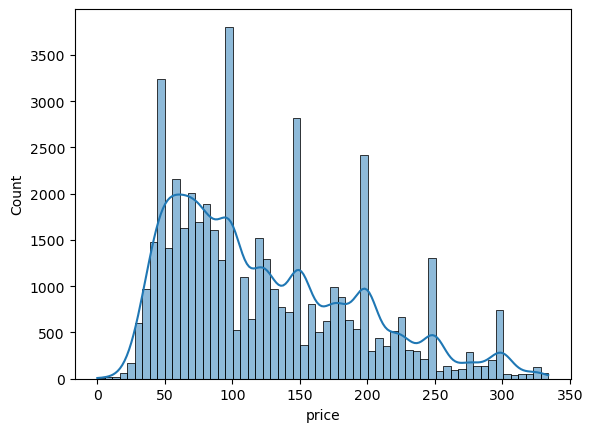

In [48]:
x_outliers = outliers_df.drop(['price'], axis=1)
y_outliers = outliers_df['price']
outliers_df['price'] = rfr.predict(x_outliers)
# Replace outliers with predicted prices
outliers_df['price']
pd.concat([df_wo_outliers, outliers_df], axis=0).sort_index()
df_wo_outliers['price'].max()
sns.histplot(df['price'], kde=True)